In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
dataset2=pd.read_csv('C_DIGO__NICO_DE_MEDICAMENTOS_VIGENTES0.csv')
dataset2=dataset2.truncate(before=90, after=190)
#dataset2.info()
#dataset2['tiporol'].unique()


In [17]:
x1=dataset2['cantidad']
x2=dataset2['fechavencimiento'].apply(lambda x:pd.to_datetime(x))
#min(x1)
type(x2)

pandas.core.series.Series

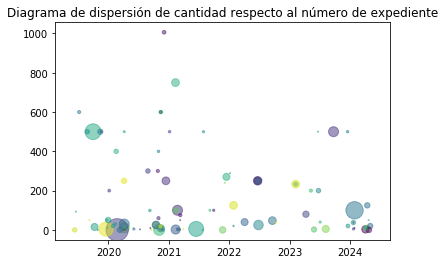

In [18]:
N=len(x2)
colors = np.random.rand(N)
area = dataset2['cantidadcum']#(15* np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x2, x1, s=area, c=colors, alpha=0.5)
plt.title('Diagrama de dispersión de cantidad respecto al número de expediente')
plt.show()

In [19]:
dataset1=pd.read_csv('Publicaciones_del_Instituto_Caro_y_Cuervo_actualizaci_n_2019.csv')
#dataset1.info()
#dataset1['EDITOR'].unique()

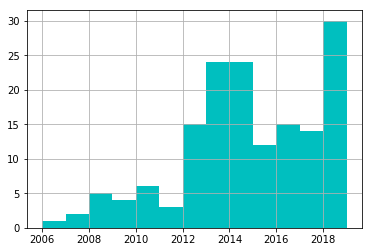

In [20]:
x3=dataset1['AÑO']
x3.hist(bins=(max(x3)-min(x3)),  facecolor='c')

In [21]:
x4=dataset2['fechavencimiento'].apply(lambda x:pd.to_datetime(x).year)
dataset2['fecha']=x4
x41=x4.unique()
x5=dataset2['tiporol'].unique()
x6=dataset2['tiporol']
#columns=x5
#columns[0]
#columns[1]
x41

array([2023, 2021, 2024, 2022, 2020, 2019])

In [22]:
data=[0,0]
data[0]=dataset2[dataset2['fecha']==2010]#.count()["value"]
#data[1]=dataset2[dataset2['tiporol']==x6[1]].count()["value"]
#len(dataset2[dataset2['fecha']==2024])


In [10]:
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(x41)))

([], <a list of 0 Text xticklabel objects>)

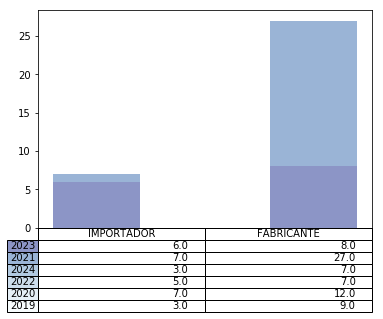

In [14]:
n_rows=len(x41)
index = np.arange(len(x5)) + 0.3
bar_width = 0.4
cell_text = []
for row in range(n_rows):    
    data=[0,0]
    dfyear=dataset2[dataset2['fecha']==x41[row]]        
    data[0]=len(dfyear[dfyear['tiporol']==x5[0]])
    data[1]=len(dfyear[dfyear['tiporol']==x5[1]])    
    plt.bar(index, data, bar_width, color=colors[row])
    #y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % data[0], '%1.1f' % data[1]])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()
#print(cell_text)


# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=x41,
                      rowColours=colors,
                      colLabels=x5,
                      loc='bottom')

# Adjust layout to make room for the table:
#plt.subplots_adjust(left=0.2, bottom=0.2)
plt.xticks([])
